At the begining of the code we will enter import all the libraries we need for this project. If new libraries are needed, they can also be loaded later

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install wordcloud

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

First we will drag and drop the following files that will be used at some points in this project: classified_tweets.csv, corpus.csv, stop_words.csv. We also convert the corpus data to dictionary and stopping words to set. It must be noted that in class column in classified_tweets.csv, 0 means negative tweet where as 4 means positive tweet

In [2]:
labelled_data = pd.read_csv('classified_tweets.csv', encoding = 'ISO 8859-1');
stop_words = pd.read_csv('stop_words.csv', encoding = 'ISO 8859-1', header = None);
stop_words = stop_words.drop(1,1);
corpus_words = pd.read_csv('corpus.csv', encoding = 'ISO 8859-1', header = None);
corpus_dictionary = corpus_words.iloc[:].set_index(0).T.to_dict('list');
stopping_words = set(stop_words.iloc[:,0].tolist())

Now we will start data cleaning by removing the weblinks from the tweets. We will use the regex to do this.

In [3]:
pattern= r"(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"

processed_data =[];
for test in range(len(labelled_data.iloc[:,5])):
   processed_data.append(re.sub(pattern,"",labelled_data.iloc[test,5]));
    

Now we will do similar process to remove the HTML tags, HTML entities and other special characters from tweets

In [4]:
for tweets in range(len(labelled_data.iloc[:,5])):   #change labelled data to processed data LATER
    #print(tweets)
    processed_data[tweets]= re.sub(r"/<[^>]+>/","",processed_data[tweets]); #html tags
    processed_data[tweets]= re.sub(r"&#[^>]+;",'',processed_data[tweets]);   #remove html entities
        
    processed_data[tweets]= processed_data[tweets].replace('.','')
    processed_data[tweets]= processed_data[tweets].replace(',','')
    processed_data[tweets]= processed_data[tweets].replace('!','')
    processed_data[tweets]= processed_data[tweets].replace('$','')
    processed_data[tweets]= processed_data[tweets].replace('%','')
    processed_data[tweets]= processed_data[tweets].replace('^','')
    processed_data[tweets]= processed_data[tweets].replace('&','')
    processed_data[tweets]= processed_data[tweets].replace('*','')
    processed_data[tweets]= processed_data[tweets].replace(':','')
    processed_data[tweets]= processed_data[tweets].replace('/','')
    processed_data[tweets]= processed_data[tweets].replace('?','')
    processed_data[tweets]= processed_data[tweets].replace('|','')
    processed_data[tweets]= processed_data[tweets].replace('(','')
    processed_data[tweets]= processed_data[tweets].replace(')','')
    processed_data[tweets]= processed_data[tweets].replace('-',' ')
    processed_data[tweets]= processed_data[tweets].replace("'"," ")
    processed_data[tweets]= processed_data[tweets].replace("#","")
    processed_data[tweets]= processed_data[tweets].replace("@","")
    processed_data[tweets]= processed_data[tweets].replace("+","")
    processed_data[tweets]= processed_data[tweets].replace('"','')
    processed_data[tweets] = processed_data[tweets].lower()
    

now we will proceed to vectorize our tweets. In order to do that we will use TFIDF vectorizer from scikit library.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF vectorization is used to create vectors of each tweets. It is the product of (term frequency in tweet) x log(total tweets/term in all the tweets)

the explanation for the vectorizer parameters:
 Sublinear_tf = true                  adds 1 to value to avoid division by zero
 max_df = 0.9999 and min_df=0.0001    these two paramerts will keep the words with frquency between 0.9999 and 0.0001
 ngram_range = (1,3)                  this use to consider features of minimum 1 to max 3 words
 stop words: 'english' and norm='l2'  will be used to remove the most common english words. the list for stop words is given below 
 strip_accents = 'ascii'              used to remove to take care of accents (special characters used for non english language)
 

In [6]:
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df=0.9999,min_df=0.0001,ngram_range=(1,3),stop_words ='english',strip_accents='ascii',norm='l2');
X = vectorizer.fit_transform(processed_data)
X_vocab = vectorizer.get_feature_names()
X_mat = X
X_idf = vectorizer.idf_

A = np.squeeze(np.asarray(X.todense()))

The stop words used in the vectorizer above are as follows:

In [7]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

frozenset({'down', 'it', 'further', 'however', 'almost', 'meanwhile', 'that', 'after', 'never', 'former', 'i', 'could', 'do', 'front', 'on', 'elsewhere', 'more', 'there', 'while', 'these', 'empty', 'been', 'ever', 'move', 'before', 'thin', 'not', 'what', 'both', 'ourselves', 'we', 'its', 'too', 'find', 'who', 'mill', 'towards', 'off', 'nobody', 'so', 'no', 'beforehand', 'thereafter', 'upon', 'very', 'enough', 'get', 'un', 'via', 'give', 'due', 'mostly', 'and', 'onto', 'otherwise', 'two', 'name', 'full', 'his', 'out', 'herself', 'show', 'either', 'hers', 'below', 'namely', 'whereby', 'own', 'every', 'besides', 'each', 'well', 'whereupon', 'latter', 'whole', 'serious', 'call', 'bill', 'inc', 'anywhere', 'con', 'am', 'any', 'fifty', 'he', 'couldnt', 'less', 'de', 'at', 'beyond', 'describe', 'because', 'nevertheless', 'interest', 'even', 'about', 'but', 'nowhere', 'wherein', 'thereupon', 'then', 'three', 'behind', 'another', 'cry', 'our', 'she', 'still', 'their', 'whatever', 'thick', 'when

Now will split the data so that: 70% is used for training and rest 30% is used for testing.Along with that it is important that data is also shuffled. PLEASE NOTE: that we tried test_train_split from Scikit. It kept giving error. Hence we will use random library to help us split the data. The data will be very very close to 70% training and 30% testing but not exact.

In [8]:
import random
iter = 0
X_tfid_train = []
Y_tfid_train = []
X_tfid_test = []
Y_tfid_test= []
for counter in A:
    if (random.random() <= 0.7):
        X_tfid_train.append(counter);
        Y_tfid_train.append(labelled_data['class'][iter])
    else:     
        X_tfid_test.append(counter);
        Y_tfid_test.append(labelled_data['class'][iter])
        
    iter = iter + 1;


Now we will train our Logistic regression model from Scikit-learn. We will use the default parameters for Logistic Regression


In [9]:
model = LogisticRegression()
model.fit(X_tfid_train,Y_tfid_train)
model.coef_

array([[-0.38689205,  0.4640983 , -0.56614631, ...,  0.21090937,
         0.01799625,  0.49897201]])

Now we will check the accuracy of our model

In [10]:
predictions = model.predict(X_tfid_test)
score = accuracy_score(Y_tfid_test,predictions)
print (score*100)


76.5890622663


It is also important we check the quality of our accuracy score. We will do that using the classification_report from Scifit learn.

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_tfid_test,predictions))



             precision    recall  f1-score   support

          0       0.78      0.74      0.76     30235
          4       0.75      0.79      0.77     29942

avg / total       0.77      0.77      0.77     60177



The results from classification report shows that the 76% approx. is good as it can predicit correctly around 76% for both the scenarios of classification.


Now we will proceed to data preperation of the unclassified data. The steps used will be exactly same as the ones used for classified data 

In [12]:
no_data = pd.read_csv('declassified_tweets.csv', encoding = 'ISO 8859-1');

#remove URL from the text
pattern= r"(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"
notag_processed_data =[];
for test in range(len(no_data.iloc[:,0])):
   notag_processed_data.append(re.sub(pattern,'',no_data.iloc[test,0]));
    
#remove HTML tags, attributes and other characeter

for counter in range(len(no_data.iloc[:,0])):
    notag_processed_data[counter] = re.sub(r"/<[^>]+>/","",notag_processed_data[counter])
    notag_processed_data[counter] = re.sub(r"&[^>]+;",'',notag_processed_data[counter])
    notag_processed_data[counter] = notag_processed_data[counter].replace('.','')
    notag_processed_data[counter] = notag_processed_data[counter].replace(',','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('!','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('$','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('%','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('^','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('&','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('*','')
    notag_processed_data[counter] = notag_processed_data[counter].replace(':','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('/','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('?','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('|','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('(','')
    notag_processed_data[counter] = notag_processed_data[counter].replace(')','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('-',' ')
    notag_processed_data[counter] = notag_processed_data[counter].replace("'"," ")
    notag_processed_data[counter] = notag_processed_data[counter].replace("#","")
    notag_processed_data[counter] = notag_processed_data[counter].replace("@","")
    notag_processed_data[counter] = notag_processed_data[counter].replace('+','')
    notag_processed_data[counter] = notag_processed_data[counter].replace('"','')
    notag_processed_data[counter] = notag_processed_data[counter].lower()

X_for_vector = notag_processed_data[:]


Before we run the data through the trained model it is very important to do some exploratory analysis to get insights of the situation or problem in hand.

we will split each tweet and see look for some words to classify the data into different parties

In [13]:
no_data['Split_Data'] = '';
for counting in range(len(notag_processed_data)):
    notag_processed_data[counting] = str.split(notag_processed_data[counting]);

no_data['Split_Data']= notag_processed_data;    

no_data['Party']='';
for candidate_counter in range(len(no_data['Split_Data'])):
    liberal_words = ['#trudeau','#justintrudeau','jt','trudeau','justin','#justin','liberal','#liberal','@JustinTrudeau','@justintrudeau','justintrudeau','liberals' ,'#liberals','red','reds','liberalparty','#liberalparty','@liberal_party','red','reds'];
    conservative_words = ['#harper','#stephenharper','harper','#harper','stephen','#stephen', 'conservative','#conservative', '@StephenHarper','@stephenharper','stephenharper','#stevenharper','pm','conservatives','#conservatives','@pmharper','blue','blueparty','#blue','@cpc_hq']                 
    ndp_words = ['ndp','#ndp','@thomasmulcair','#thomasmulcair','tom','#tom','mulcair','#mulcair','thomas','ndpparty','#ndpparty','#tommulcair','orange','#orange','orangeparty','#orangeparty']
    liberal_count = 0;
    conservative_count =0;
    ndp_count = 0;
    other_count =0;
    for words in no_data.iloc[candidate_counter,1]:
        if words in liberal_words:
            liberal_count +=1;
        elif words in conservative_words:
            conservative_count +=1;
        elif words in ndp_words:
            ndp_count +=1;
        else:
            other_count =1;
     
    if liberal_count > conservative_count and liberal_count > ndp_count:
        no_data.iloc[candidate_counter,2] = 'LIBERAL';
    elif conservative_count >liberal_count and conservative_count > ndp_count:
        no_data.iloc[candidate_counter,2] = 'CONSERVATIVE'
    elif ndp_count >liberal_count and ndp_count>conservative_count:
        no_data.iloc[candidate_counter,2] = 'NDP'
    else:
        no_data.iloc[candidate_counter,2] = 'OTHER'

Now we will see the graphical model of data. The graph will be divided 4 categories

In [14]:
%matplotlib inline  

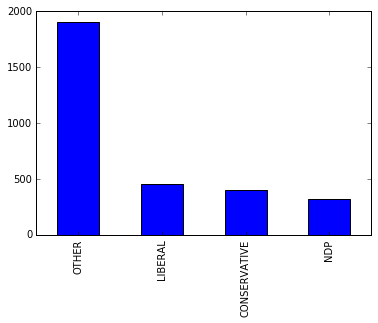

In [15]:
no_data.Party.value_counts().plot(kind='bar')

The graph above shows that among the three major parties in Canada. People are tweeting most about Liberals. It should also be noted that the bar labelled OTHER have information that is mixed. That means the tweets associated to the bar might have information related to multiple parties or none. We will use more methods like word cloud later to get some deeper insights.

Now will send unclassified data to trained logistic regression model to complete our analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3636bee898>]], dtype=object)

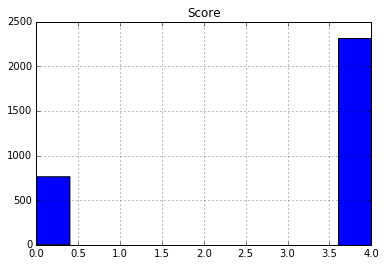

In [16]:
X_no_data = vectorizer.transform(X_for_vector)
X_for_prediction = X_no_data.todense()

Sentiment = model.predict(X_for_prediction)
no_data['Score']= Sentiment;
no_data.hist('Score')

We notice that the unclassified tweets has more positive tweets.

Now we can classify this data based on the party to get better insights of the canadian politics.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3636d500b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3630c335c0>]], dtype=object)

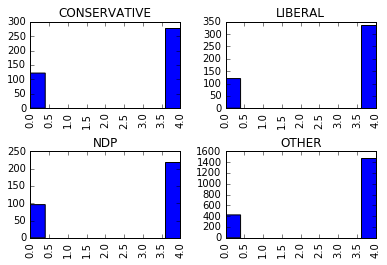

In [17]:
no_data.hist('Score',by='Party')


From the graps above it is very clearly visible that Liberals has the most positive tweets. Along with that when it comes to negative tweets it has lower negative tweets than its biggest competitor (CONSERVATIVE party). Hence the Librals have higher chances of winning the election as they have most positivity on their end compared to its competitiors.

BONUS ATTEMPT

We will now create word cloud from the processed data to get more insights of the data. That will also eliminate confusion due to hidden information associated with data classified to OTHER

In order to do that we will create dictionary of positive and negative tweets. The dictionary will have frequency of each associated word. Before create dictionary we will do data cleaning using the words from file stop_words. First we will start with positive tweets  

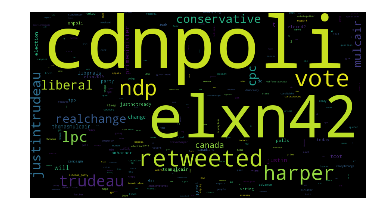

In [18]:
happy_tweets =[];
happy_tweets = no_data.loc[no_data['Score']== 4,'Split_Data']
happy_tweets = happy_tweets.tolist()

happy_databank=[];    
for data_counter in range(len(happy_tweets)):
    happy_databank += happy_tweets[data_counter]

happy_databank_ws=[]
for words in happy_databank:
    if words not in stopping_words:
        happy_databank_ws.append(words);

happy_frequency_dictionary ={}    
for bankword in happy_databank_ws:
    if bankword not in happy_frequency_dictionary:
        happy_frequency_dictionary[bankword] = 0
    happy_frequency_dictionary[bankword] +=1



from wordcloud import WordCloud

wordcloud = WordCloud(width=900,height=500, max_words=1000,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(happy_frequency_dictionary)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Notice that words like elxn42, cdnpoli, vote and retweeted are very common. That makes sense are they are the most popular hashtags used during elections. We will remove those words to see whats most common after that 

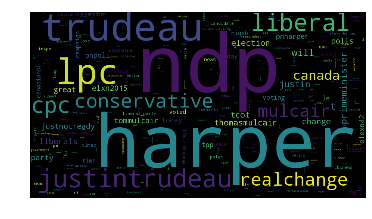

In [19]:
del happy_frequency_dictionary['cdnpoli']
del happy_frequency_dictionary['elxn42']
del happy_frequency_dictionary['retweeted']
del happy_frequency_dictionary['vote']

wordcloud = WordCloud(width=900,height=500, max_words=1000,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(happy_frequency_dictionary)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see the term harper and ndp are the most frequent one. but following that the frequent words are trudeau, lpc, liberal,justintrudeau and real change. To make final conclusion we must create the word cloud for negative tweets.

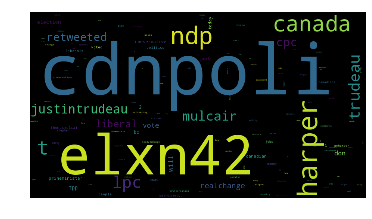

In [20]:
unhappy_tweets =[];
unhappy_tweets = no_data.loc[no_data['Score']== 0,'Split_Data']
unhappy_tweets = unhappy_tweets.tolist()

unhappy_databank=[];    
for data_counter in range(len(unhappy_tweets)):
    unhappy_databank += unhappy_tweets[data_counter]

unhappy_databank_ws=[]
for words in unhappy_databank:
    if words not in stopping_words:
        unhappy_databank_ws.append(words);

unhappy_frequency_dictionary ={}    
for bankword in unhappy_databank_ws:
    if bankword not in unhappy_frequency_dictionary:
        unhappy_frequency_dictionary[bankword] = 0
    unhappy_frequency_dictionary[bankword] +=1

wordcloud = WordCloud(width=900,height=500, max_words=1000,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(unhappy_frequency_dictionary)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Here again the words cdnpoli, elxn42, vote and retweeted are common. we will remove those words to see what is common after that.

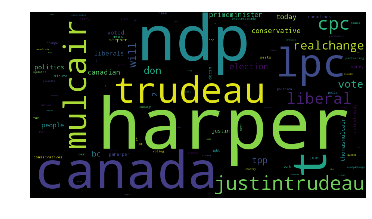

In [21]:
del unhappy_frequency_dictionary['cdnpoli']
del unhappy_frequency_dictionary['elxn42']
del unhappy_frequency_dictionary['retweeted']

wordcloud = WordCloud(width=900,height=500, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(unhappy_frequency_dictionary)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the negative tweets, we see that most frequent words are harper, ndp, canada. Followed by trudeau, mulcair cpc.

Hence based on the sentiment histogram charts (grouped by parties) and Word clouds, we can conclude that Liberals have relatively more associated to their tweets just before the election. Based on the data, we can predict Liberals should win. But this data is from 2015 election, we know the predictions is right as Liberals won the election by majority.